# Titanic
## Workflow goals
The data science solutions workflow solves for seven major goals.

### Classifying 
We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

### Correlating
One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

### Converting
For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

### Completing
Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

### Correcting
We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

### Creating
Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

### Charting
How to select the right visualization plots and charts depending on nature of the data and the 

In [20]:
# data analysis and wrangling

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import hist
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# prettify
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Dictionary
VariableDefinitionKey 
**survival**: Survival 0 = No, 1 = Yes <br>
**pclass**: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
**sex**: Sex Age Age in years <br>
**sibsp**: # of siblings / spouses aboard the Titanic <br>
**parch**: # of parents / children aboard the Titanic <br>
**ticket**: Ticket number <br>
**fare**: Passenger fare <br>
**cabin**: Cabin number <br>
**embarked**: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton<br>
<br><br>

### Variable Notes
**pclass**: A proxy for socio-economic status (SES)<br>
* 1st = Upper<br>
* 2nd = Middle<br>
* 3rd = Lower<br>

**age**: Age<br> 
Fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>

**sibsp**: The dataset defines family relations in this way...<br>
* **Sibling** = brother, sister, stepbrother, stepsister<br>
* **Spouse** = husband, wife (mistresses and fiancés were ignored)<br>

**parch**: The dataset defines family relations in this way...<br>
* **Parent** = mother, father<br>
* **Child** = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>

## Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.
<br><br>

### Which features are available in the dataset?

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the Kaggle data page here.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
<br><br>
**Categorical**: Survived, Sex, and Embarked. <br>
**Ordinal**: Pclass.
<br><br>

### Which features are numerical? 
These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
<br><br>
**Continous**: Age, Fare. <br>
**Discrete**: SibSp, Parch.

<Br><br>
    
### Categorical vs Ordinal
<Br>
    
#### Categorical
A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  <br>
**Examples**
* Male vs Female
* Cars, Trucks, Vans
<br><br>

#### Ordinal
An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  <br>
**Examples**
* Economic Status: Poor, Middle Class, Rich
* Child, Teen, Adult
* Boss, Supervisor, CEO

In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

* Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
<br><br>

### Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

* Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Which features contain blank, null or empty values?

### These will require correcting.

* Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.<br>
* Cabin > Age are incomplete in case of test dataset.<br>
<br>

### What are the data types for various features?

Helping us during converting goal.<br>
* Seven features are integer or floats. Six in case of test dataset.<Br>
* Five features are strings (object).<Br>

In [6]:
print("Training Data")
train_df.info()
print('_'*40)
print("Test Data")
test_df.info()

Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Tic

### What is the distribution of numerical feature values across the samples?
<br>
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.<br>

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (less  than 1%) paying as high as 512.
* Few elderly passengers (less than 1%) within age range 65-80.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the distribution of categorical features?

* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peters, Miss. Katie",male,1601,G6,S
freq,1,577,7,4,644


## Assumptions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.<br>
<br>
**Correlating**
<br>
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.<br>
<br>
**Completing**
<br>
We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.<br>
<br>
**Correcting**
<br>
* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
<br><br>

**Creating**

* We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
* We may want to engineer the Name feature to extract Title as a new feature.
* We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a Fare range feature if it helps our analysis.
<br><br>

**Classifying**

We may also add to our assumptions based on the problem description noted earlier.
* Women (Sex=female) were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.

<br><br>
### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.<br>
<br>
* **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* **SibSp** and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


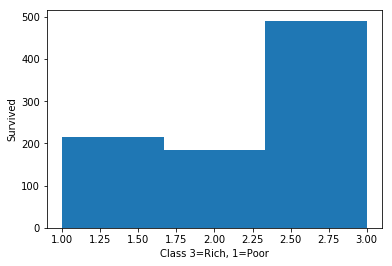

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
num_bins = 3
n, bins, patches = plt.hist(train_df['Pclass'], num_bins)
x = plt.xlabel('Class 3=Rich, 1=Poor')
y = plt.ylabel('Survived')
plt.show()

In [13]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.<br>
<br>

#### Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).<br>
<br>
A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)<br>
<br>
Note that x-axis in historgram visualizations represents the count of samples or passengers.<br>
<br>

#### Observations.
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.
<br><br>

#### Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.<br>
* We should consider Age (our assumption classifying #2) in our model training.
* Complete the Age feature for null values (completing #1).
* We should band age groups (creating #3).

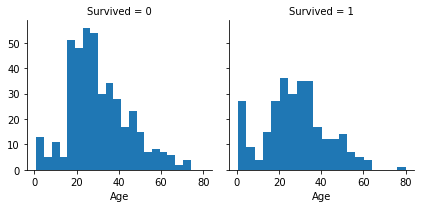

In [25]:
# bins=20 will break up the grid overall into 20 groups
# more bins = more detail, but might get harder to see patterns
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#num_bins = 20
#n, bins, patches = plt.hist(train_df['Age'], num_bins, facecolor='blue', alpha=0.5)
#x = plt.xlabel('Age')
#y = plt.ylabel('Survived')
#plt.show()




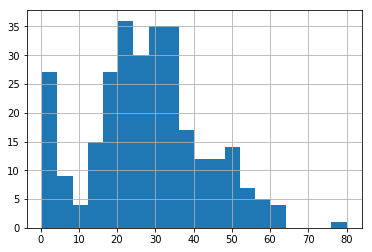

In [82]:
ageSurvived=train_df[["Age", "Survived"]].where(train_df['Survived']==1)
ageSurvived['Age'].hist(bins=20)
#ageSurvived

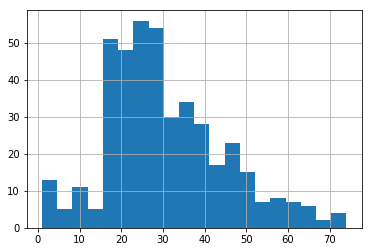

In [83]:
ageDied=train_df[["Age", "Survived"]].where(train_df['Survived']==0)
ageDied['Age'].hist(bins=20)


## Correlating categorical features
Now we can correlate categorical features with our solution goal.<br>
<br>

### Observations.
* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

<br>
    
### Decisions.
* Add Sex feature to model training.
* Complete and add Embarked feature to model training.

C:\Users\agust\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\agust\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


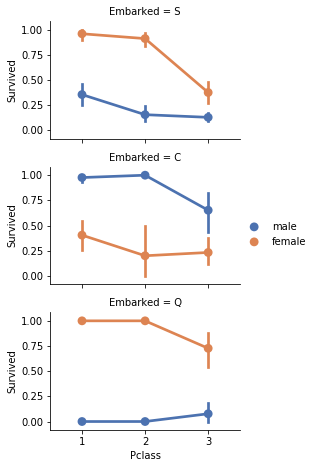

In [86]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).<br>
<br>

### Observations.

* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).
<br><br>

### Decisions.

Consider banding Fare feature.

C:\Users\agust\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\agust\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


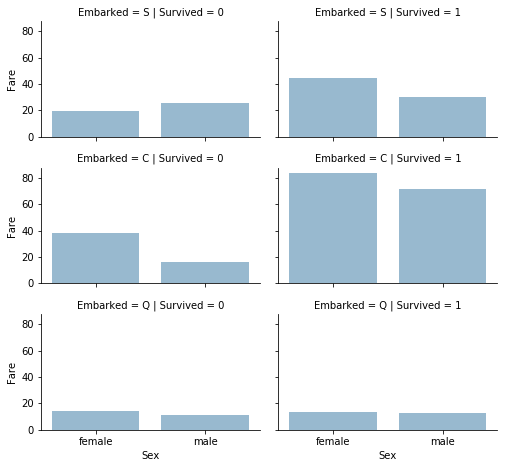

In [87]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()